# Imports

In [293]:
# Here we will import the necessary libraries
import pandas as pd

# We will read the data from the csv file
project_data_raw = pd.read_csv('1638701turnover.csv')

# Remove rows with any missing values
project_data = project_data_raw.dropna()

# Imports for exercise 1
import matplotlib.pyplot as plt
import seaborn as sn

# Imports for exercise 2
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function
from statsmodels.tools.tools import add_constant #import the add_constant function
from stargazer.stargazer import Stargazer
from stargazer.stargazer import Stargazer, LineLocation
from IPython.core.display import HTML
from sklearn.preprocessing import StandardScaler

# Imports for exercise 4
import numpy as np
from numpy import mean
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from scikeras.wrappers import KerasRegressor

# Exercise 1

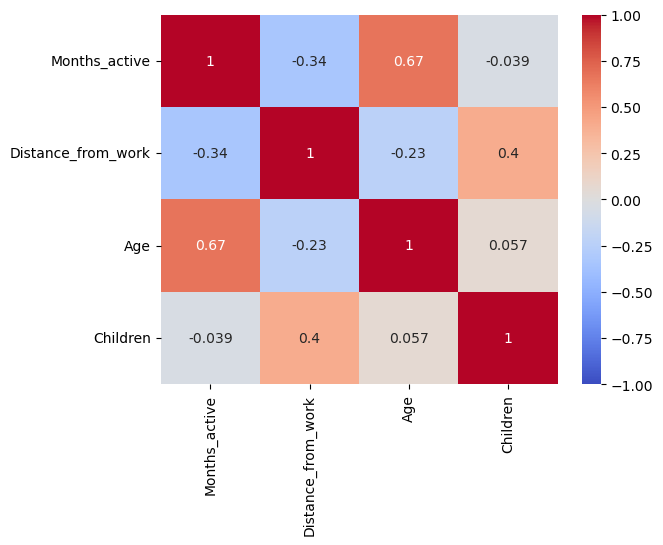

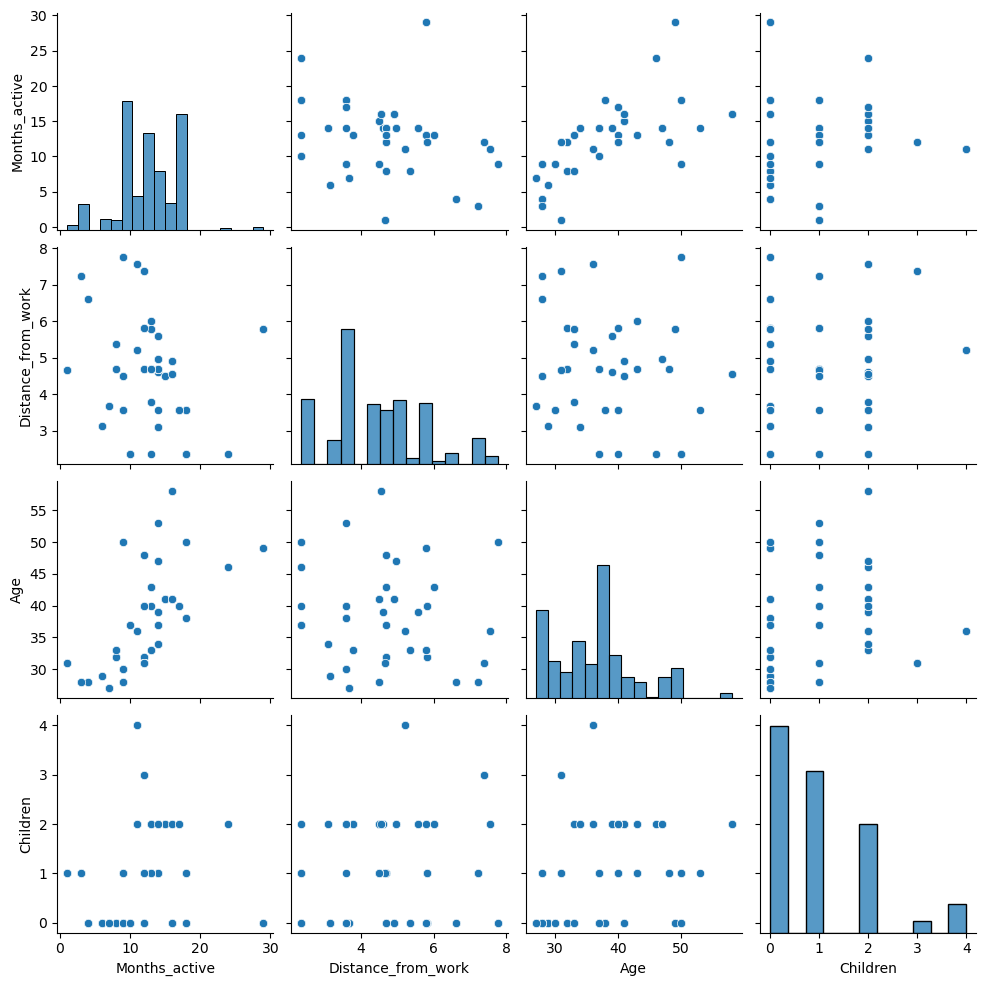

In [281]:
# Selece the columns we want to use for the pairplot
Correlation = project_data[['Months_active','Distance_from_work','Age','Children',]] 

# Corrolate the pairplot in matrix form
matrix = Correlation.corr() 
sn.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
# Create the pairplot
sn.pairplot(Correlation)
plt.show() 

# Exercise 2

#### **First**

In [282]:
# Creating dummy variables for the categorical variables
project_data_dummies = pd.get_dummies(project_data, columns=['Disciplined','Social_drinker','Social_smoker'],dtype=int,drop_first=True)
project_data_dummies.head()

,Months_active,Distance_from_work,Age,Children,Pets,Weight,Height,BMI,Absent_hours,Disciplined_yes,Social_drinker_yes,Social_smoker_yes
0,9,3.58,30,0,0,56,171,19,2,0,0,0
1,4,6.60,28,0,0,84,182,25,0,1,0,0
2,13,5.78,33,2,1,90,172,30,8,0,1,0
3,9,7.76,50,0,0,76,178,24,8,0,0,0
4,12,5.82,40,1,1,73,171,25,2,0,1,0


In [283]:
# Get all column names except the dependent variable
independent_vars = project_data_dummies.columns.difference(['Months_active'])
# Create the formula dynamically
formula = 'Months_active ~ ' + ' + '.join(independent_vars)

# Fit the regression model off independent variables together with the dependent variable
model1 = sm.ols(formula, data=project_data_dummies).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          1.81e-145
Time:                        20:39:54   Log-Likelihood:                -1559.6
No. Observations:                 666   AIC:                             3143.
Df Residuals:                     654   BIC:                             3197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             87.4175     14

#### **Second**

In [284]:
# a constant column for the intercept, constant is added to the independent variables
X = add_constant(project_data_dummies[independent_vars])

# Calculate the VIF
VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns # Get the column names
VIF_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])] # Calculate the VIF
print(VIF_data) # Print the VIF

              variable           VIF
0                const  22786.557874
1         Absent_hours      1.066624
2                  Age      1.607393
3                  BMI    139.454260
4             Children      1.349619
5      Disciplined_yes      1.071933
6   Distance_from_work      1.611213
7               Height     27.468663
8                 Pets      1.309347
9   Social_drinker_yes      1.408044
10   Social_smoker_yes      1.204611
11              Weight    150.579765


In [285]:
# Remove the variables, first goes to height and weight, because that combined makes bmi
# But first remove weight and see if height is still significant, because weight has a higher VIF
independent_vars = project_data_dummies.columns.difference(['Months_active', 'Weight'])

# a constant column for the intercept, constant is added to the independent variables
X = add_constant(project_data_dummies[independent_vars])

# Calculate the VIF
VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns # Get the column names
VIF_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])] # Calculate the VIF
print(VIF_data) # Print the VIF

              variable          VIF
0                const  1252.791638
1         Absent_hours     1.065806
2                  Age     1.607384
3                  BMI     1.683559
4             Children     1.340849
5      Disciplined_yes     1.069648
6   Distance_from_work     1.609453
7               Height     1.182635
8                 Pets     1.274451
9   Social_drinker_yes     1.406451
10   Social_smoker_yes     1.161073


#### **Third**

In [286]:
# Dummies to standardize
project_data_standardized = project_data_dummies.copy()

# standardize the data
project_data_standardized[independent_vars] = StandardScaler().fit_transform(project_data_standardized[independent_vars])

# Show the standardized data
project_data_standardized.head()


,Months_active,Distance_from_work,Age,Children,Pets,Weight,Height,BMI,Absent_hours,Disciplined_yes,Social_drinker_yes,Social_smoker_yes
0,9,-0.631497,-0.980184,-0.933745,-0.573643,56,-0.178038,-1.804559,-0.365537,-0.235515,-1.131734,-0.275552
1,4,1.631442,-1.286808,-0.933745,-0.573643,84,1.679945,-0.401910,-0.512635,4.246007,-1.131734,-0.275552
2,13,1.017001,-0.520248,0.892611,0.193518,90,-0.009130,0.766964,0.075758,-0.235515,0.883600,-0.275552
3,9,2.500650,2.086056,-0.933745,-0.573643,76,1.004315,-0.635685,0.075758,-0.235515,-1.131734,-0.275552
4,12,1.046974,0.552936,-0.020567,0.193518,73,-0.178038,-0.401910,-0.365537,-0.235515,0.883600,-0.275552


In [287]:
#Build the regression model
model2 = sm.ols(formula, data=project_data_standardized).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          1.81e-145
Time:                        20:39:54   Log-Likelihood:                -1559.6
No. Observations:                 666   AIC:                             3143.
Df Residuals:                     654   BIC:                             3197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -25.6324      7

In [288]:
# Regression model to APA
Table = Stargazer([model2])
Table.title('Regression Model for Months Active') #Give it a title 
Table.custom_columns(['Model'])
Table.show_model_numbers(False)
Table.significant_digits(2) #Change decimals to 2
Table.rename_covariates({'Social_smoker_yes':'Social_smoker','Social_drinker_yes':'Social_drinker',
                         'Disciplined_yes':'Disciplined','Distance_from_work':'Distance from work',
                         'Absent_hours':'Absent hours'}) #Rename relevant Variables
Table.add_custom_notes(['All continuous variables have been standardized']) #Add note about standardization
Table.custom_note_label('') #Remove the word "Note:" 
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom 

HTML(Table.render_html()) #Render in HTML

# Exercise 3

# Exercise 4

#### **First**

In [304]:
#Prepare the data
dependable_variables = project_data_dummies['Months_active'] #select Target
independable_variables = project_data_dummies.drop('Months_active','Weight',axis=1) #Select features

#Prediction with all features
#define the cross-validation
cv = RepeatedKFold(n_splits=5, #splits the data into 5 folds
                   random_state=420) #adding a number here ensures it will be the same each time

#predict with linear regression
lm = LinearRegression()
lmscores = cross_val_score(lm, independable_variables, dependable_variables, #these define the type of model, features, and target
                           scoring='neg_mean_absolute_error', #test using mean absolute deviation
                           cv=cv) #this loads the cross validation we wrote above


lmMAE = mean(absolute(lmscores)) #Calculate the overall mean absolute error
print('the average prediction error with full data is: %.4f' % lmMAE) #Print the result

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given

#### **Second**

In [290]:
# Normalizing the data
columns = independable_variables.columns #create index with column names (needed for last step)
scaler = MinMaxScaler() #initiate the scaler
independable_variables = scaler.fit_transform(independable_variables) #scale the data
independable_variables = pd.DataFrame(independable_variables,columns=columns) #turn back into a dataframe

In [291]:
RidgeModel = Ridge(alpha=5)

#Run the cross fold validation again (same as earlier)
scoresridge = cross_val_score(RidgeModel, independable_variables, dependable_variables, scoring='neg_mean_absolute_error', cv=cv) 

#Evaluate the model
print('the average prediction error with linear regression was: %.4f' % lmMAE)
ridgeMAE = mean(absolute(scoresridge)) #Calculate the overall mean absolute error
print('the average prediction error with ridge is: %.4f' % ridgeMAE) #Print the result

the average prediction error with linear regression was: 2.0406
the average prediction error with ridge is: 2.0322


#### **Third**

In [300]:
#Exercise 1.1: Ridge grid search
#grid search with Ridge
alpha_range = np.arange(start=1,stop=100,step=1) #define a range of 100 alpha values

#define the aspects of the grid search
cv = RepeatedKFold(n_splits=5) #define the cross validation
param = {'alpha':alpha_range} #create a dictionary that contains the range of alpha values
RidgeModel = Ridge() #define the model

#create the grid search
RidgeM = GridSearchCV(RidgeModel,
                      param_grid=param, #the alpha values we defined above
                      scoring ='neg_mean_absolute_error', #use MAE as measure of fit
                      cv=cv) #the cross validation we defined above
RidgeM.fit(independable_variables,dependable_variables)# Fit the random search model
print("Best alpha: ", RidgeM.best_params_['alpha']) #print out the best parameter

Best alpha:  15


In [301]:
RidgeModel = Ridge(alpha=RidgeM.best_params_['alpha'])

#Run the cross fold validation again (same as earlier)
scoresridge = cross_val_score(RidgeModel, independable_variables, dependable_variables, scoring='neg_mean_absolute_error', cv=cv) 

#Evaluate the model
ridgeMAE_gridsearch = mean(absolute(scoresridge)) #Calculate the overall mean absolute error
print('the average prediction error with ridge range 5 is: %.4f' % ridgeMAE) #Print the result
print('the average prediction error with ridge grid search is: %.4f' % ridgeMAE_gridsearch) 

the average prediction error with ridge range 5 is: 2.0322
the average prediction error with ridge grid search is: 1.9821


In [302]:
#Neural network with cross validation

#First define a function that contains the neural network model
def create_baseline():
    # create model
    nnmodel = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),  # Input layer 
        tf.keras.layers.Dense(64, activation='softplus'), #hidden layer
        tf.keras.layers.Dense(64, activation='softplus'), #hidden layer
        tf.keras.layers.Dense(64, activation='softplus'), #hidden layer
        tf.keras.layers.Dense(1)  # Output layer
    ])
    # Compile model
    nnmodel.compile(loss='mean_absolute_error', #loss is calculated with MAE
                    optimizer='adam', #type of gradient descent
                    metrics=['mae']) #use MAE to evaluate the model
    return nnmodel

# evaluate model 

#define the estimator
estimator = KerasRegressor(build_fn=create_baseline, #you have to use the kerasRegressor wrapper for nn models
                           epochs=100, batch_size=5, #100 epochs and 5 batches
                           verbose=0) #this will shorten the output text
#Define the kfold function
kfold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42) #I'm using just 5 splits and 1 repeat to save time, but more splits and repeats will be more accurate
#Generate the results
results = cross_val_score(estimator, X, y, cv=kfold,scoring='neg_mean_absolute_error')
#Print the results
print('the average prediction error is: %.0f' % mean(absolute(results)))

AttributeError: 'super' object has no attribute '__sklearn_tags__'